In [4]:
# Instalar e importar bibliotecas necessárias
import pandas as pd
import sqlite3


In [6]:
# Carregar os arquivos CSV em DataFrames
users = pd.read_csv("users.csv")
events = pd.read_csv("events.csv")
games = pd.read_csv("games.csv")
devices = pd.read_csv("devices.csv")


In [7]:
# Criar conexão com SQLite em memória
conn = sqlite3.connect(':memory:')

# Enviar os DataFrames para o banco como tabelas
users.to_sql('users', conn, index=False, if_exists='replace')
events.to_sql('events', conn, index=False, if_exists='replace')
games.to_sql('games', conn, index=False, if_exists='replace')
devices.to_sql('devices', conn, index=False, if_exists='replace')


5

In [22]:
# Visualizar os primeiros registros da tabela users
print("Tabela: users")
pd.read_sql_query("SELECT * FROM users", conn)


📋 Tabela: users


,index,user_id,age,registration_date,email,workout_frequency
0,0,1,56,2022-09-20T00:00:00.000,hi_1@example.com,None
1,1,2,46,2020-06-21T00:00:00.000,hello_2@myemail.com,Minimal
2,2,3,32,2020-02-08T00:00:00.000,hello_3@email.com,Maximal
3,3,4,60,2023-02-25T00:00:00.000,user4@email.com,Maximal
4,4,5,25,2021-03-03T00:00:00.000,hi_5@email.com,minimal
...,...,...,...,...,...,...
345,345,346,48,2022-09-30T00:00:00.000,contact_346@example.com,Flexible
346,346,347,52,2020-06-01T00:00:00.000,contact_347@email.com,Minimal
347,347,348,50,2020-04-04T00:00:00.000,contact348@example.com,None
348,348,349,38,2021-09-17T00:00:00.000,hi349@email.com,regular


In [19]:
# Visualizar os primeiros registros da tabela games
print("Tabela: games")
pd.read_sql_query("SELECT * FROM games", conn)


🎮 Tabela: games


,index,game_id,game_type
0,0,1,biking
1,1,2,rowing
2,2,3,dancing
3,3,4,running
4,999,-1,unknown


In [20]:
# Visualizar os primeiros registros da tabela devices
print("Tabela: devices")
pd.read_sql_query("SELECT * FROM devices", conn)


🕶️ Tabela: devices


,index,device_id,device_name,version
0,0,1,reActiV,v2
1,1,2,ActiV,v2
2,2,3,reActiV,v5
3,3,4,ActiV,v4
4,4,5,ActiK,v4


In [21]:
# Visualizar os primeiros registros da tabela events
print("Tabela: events")
pd.read_sql_query("SELECT * FROM events", conn)


🎯 Tabela: events


,index,event_id,game_id,device_id,user_id,event_time
0,0,1,3,4,73,2021-06-11T02:07:04.000
1,1,2,3,5,141,2023-05-28T16:15:07.000
2,2,3,4,1,70,2023-08-31T13:28:50.000
3,3,4,-1,2,262,2020-06-18T17:50:41.000
4,4,5,1,2,340,2021-01-21T06:34:48.000
...,...,...,...,...,...,...
1495,1495,1496,4,1,225,2022-12-17T22:48:18.000
1496,1496,1497,1,2,333,2022-04-19T03:50:09.000
1497,1497,1498,1,3,42,2021-10-13T02:10:40.000
1498,1498,1499,1,1,303,2022-07-01T09:38:06.000


#Desafio de Análise de Dados - ActiVR

Contexto:
A ActiVR é uma empresa que desenvolve dispositivos de realidade virtual voltados para exercícios físicos e bem-estar.

A ActiVR oferece uma variedade de produtos, incluindo dispositivos VR e programas de treino por assinatura através de seus aplicativos.

O time de vendas da ActiVR deseja analisar os dados dos usuários para aprimorar suas estratégias de marketing e avaliar a performance de seus produtos.
Para isso, é fundamental que os dados estejam limpos, precisos e disponíveis para geração de relatórios.

Eles precisam da sua ajuda para preparar esses dados antes do lançamento de uma nova campanha promocional.

#Esquema do Banco de Dados

A estrutura do banco de dados da ActiVR está organizada da seguinte forma:

*   events: Contém registros de eventos gerados durante os jogos.
*   games: Armazena informações sobre os diferentes jogos disponíveis na plataforma.
*   devices: Guarda dados sobre os dispositivos de realidade virtual utilizados pelos usuários.
*   users: Contém informações dos usuários que utilizam a plataforma ActiVR.


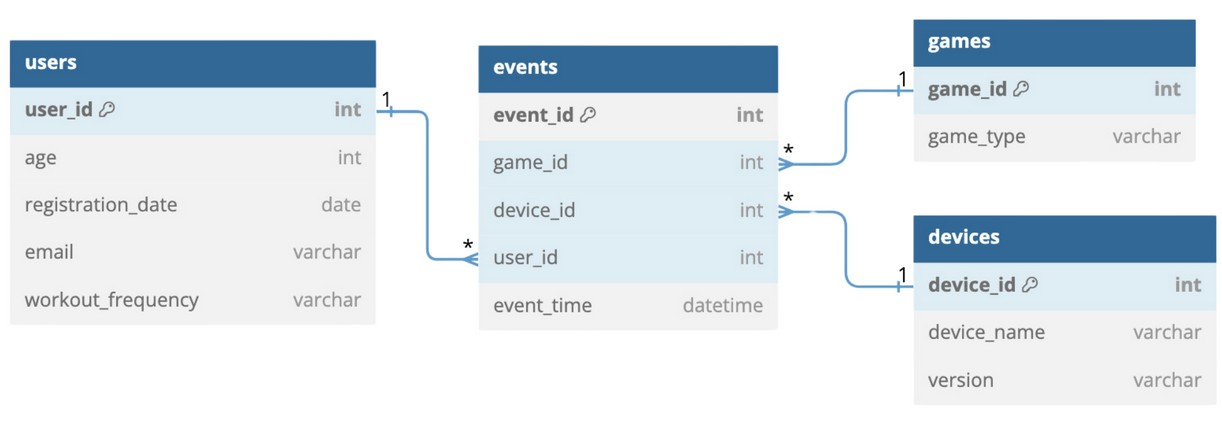
    

    

    

    

#Tarefa 1

A equipe de vendas da ActiVR deseja utilizar as informações que possui sobre os usuários para marketing direcionado.

No entanto, eles suspeitam que os dados possam precisar ser limpos antes disso.

O formato e os tipos de dados esperados para a tabela users, de acordo com os requisitos da equipe de vendas, estão descritos na tabela abaixo.

Escreva uma consulta SQL que retorne a tabela users com o formato especificado, incluindo a identificação e limpeza de todos os valores inválidos.

*   A saída deve ser um DataFrame com o nome clean_data. Não modifique a tabela users.
*   Observe que o ambiente DataLab formata datas como YYYY-MM-DD-hh-ss-SSS.

| Nome da Coluna      | Descrição                                                                                                                                                                   |
| ------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `user_id`           | Inteiro único (atribuído pelo banco de dados, não pode ser alterado). Valores ausentes não são possíveis devido à estrutura do banco.                                       |
| `age`               | Idade do cliente (inteiro). Valores ausentes devem ser substituídos pela média das idades.                                                                                  |
| `registration_date` | Data em que o usuário criou a conta. Valores ausentes devem ser substituídos por 1º de janeiro de 2024, no formato apropriado.                                              |
| `email`             | Endereço de e-mail do usuário. Valores ausentes devem ser substituídos por `Unknown`.                                                                                       |
| `workout_frequency` | Frequência de treino como string em letras minúsculas, uma das opções: *minimal*, *flexible*, *regular*, *maximal*. Valores ausentes devem ser substituídos por `flexible`. |
    

In [10]:
clean_data = pd.read_sql_query("""
WITH AvgAge AS (
    SELECT ROUND(AVG(age)) AS average_age
    FROM users
)
SELECT
    u.user_id,
    COALESCE(u.age, (SELECT average_age FROM AvgAge)) AS age,
    COALESCE(u.registration_date, '2024-01-01-00-00-000') AS registration_date,
    COALESCE(u.email, 'Unknown') AS email,
    COALESCE(LOWER(u.workout_frequency), 'flexible') AS workout_frequency
FROM users u
""", conn)

# Mostrar os primeiros registros
clean_data.head(100)


,user_id,age,registration_date,email,workout_frequency
0,1,56,2022-09-20T00:00:00.000,hi_1@example.com,flexible
1,2,46,2020-06-21T00:00:00.000,hello_2@myemail.com,minimal
2,3,32,2020-02-08T00:00:00.000,hello_3@email.com,maximal
3,4,60,2023-02-25T00:00:00.000,user4@email.com,maximal
4,5,25,2021-03-03T00:00:00.000,hi_5@email.com,minimal
...,...,...,...,...,...
95,96,24,2021-07-20T00:00:00.000,user96@example.com,regular
96,97,26,2020-09-09T00:00:00.000,hello_97@email.com,flexible
97,98,41,2021-07-29T00:00:00.000,contact98@example.com,flexible
98,99,18,2021-07-05T00:00:00.000,hi99@myemail.com,flexible


#Tarefa 2

Parece que há valores ausentes na coluna game_id da tabela events para todos os eventos anteriores ao ano de 2021.

No entanto, sabemos que antes de 2021 só existiam jogos cujo game_type era running. O game_id desses jogos pode ser encontrado na tabela games.

Escreva uma consulta SQL para que a tabela events contenha um game_id para todos os eventos, inclusive aqueles anteriores a 2021.

*   A saída deve ser um DataFrame com o nome events_with_game_id. Não modifique a tabela events.




    

In [12]:
events_with_game_id = pd.read_sql_query("""
SELECT
    e.event_id,
    CASE
        WHEN strftime('%Y', e.event_time) < '2021' AND e.game_id IS NULL THEN (
            SELECT g.game_id
            FROM games g
            WHERE g.game_type = 'running'
            LIMIT 1
        )
        ELSE e.game_id
    END AS game_id,
    e.device_id,
    e.user_id,
    e.event_time
FROM events e
""", conn)

events_with_game_id.head(100)


,event_id,game_id,device_id,user_id,event_time
0,1,3,4,73,2021-06-11T02:07:04.000
1,2,3,5,141,2023-05-28T16:15:07.000
2,3,4,1,70,2023-08-31T13:28:50.000
3,4,-1,2,262,2020-06-18T17:50:41.000
4,5,1,2,340,2021-01-21T06:34:48.000
...,...,...,...,...,...
95,96,3,5,248,2022-06-03T23:02:19.000
96,97,2,5,29,2021-01-17T11:34:24.000
97,98,1,4,280,2022-06-18T07:40:00.000
98,99,3,3,338,2022-07-12T13:16:50.000


#Tarefa 3

A equipe de vendas da ActiVR pretende lançar uma promoção para upgrades dos dispositivos de realidade virtual.

O objetivo é direcionar essa promoção para clientes que participaram de eventos relacionados a tipos específicos de jogos.

Escreva uma consulta SQL que retorne o user_id e o event_time para os usuários que participaram de eventos relacionados a jogos do tipo biking.

*   A saída deve ser um DataFrame com o nome event_biking.



    

In [13]:
event_biking = pd.read_sql_query("""
SELECT
    e.user_id,
    e.event_time
FROM events e
JOIN games g ON e.game_id = g.game_id
WHERE g.game_type = 'biking'
""", conn)

event_biking.head()


,user_id,event_time
0,2,2022-02-13T04:47:07.000
1,2,2022-10-22T22:32:44.000
2,4,2022-12-08T19:46:56.000
3,5,2021-09-14T01:56:31.000
4,5,2022-01-24T10:02:45.000


#Tarefa 4

Após realizar a promoção, a equipe de vendas da ActiVR deseja investigar os resultados.

Para isso, eles precisam de informações sobre a quantidade de usuários que participaram de eventos, agrupados por game_type.

Escreva uma consulta SQL que retorne a contagem de usuários únicos para cada tipo de jogo (game_type) e game_id.
Registros com game_type ausente devem ser ignorados.
A contagem de usuários deve ser exibida na coluna user_count.

*   A saída deve ser um DataFrame com o nome users_game.


In [14]:
users_game = pd.read_sql_query("""
SELECT
    g.game_type,
    e.game_id,
    COUNT(DISTINCT e.user_id) AS user_count
FROM events e
JOIN games g ON e.game_id = g.game_id
WHERE g.game_type IS NOT NULL
GROUP BY g.game_type, e.game_id
""", conn)

users_game.head()


,game_type,game_id,user_count
0,biking,1,198
1,dancing,3,193
2,rowing,2,205
3,running,4,202
4,unknown,-1,220
